In [4]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/gp/ty9f60fj7wsc56qdx6z7t45w0000gn/T/ipykernel_51561/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#Positive Emotion Data
df_pos = pd.read_csv('/Users/alexisbader/Desktop/446 Data/Negative/Natcha/power_by_band_data-1.csv')
df_pos = df_pos.drop('label', axis=1)

# Negative Emotion Data
df_neg = pd.read_csv('/Users/alexisbader/Desktop/446 Data/Negative/Natcha/power_by_band_data-1.csv')
df_neg = df_neg.drop('label', axis=1)


In [6]:
grouped_pos = df_pos.groupby('state')
mean_values_pos = grouped_pos.mean()

grouped_neg = df_neg.groupby('state')
mean_values_neg = grouped_neg.mean()

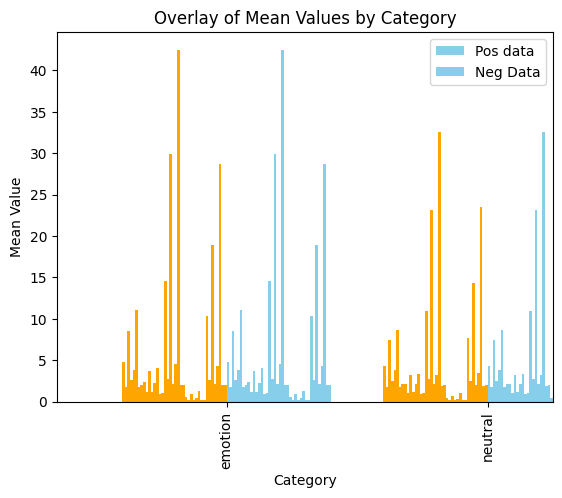

In [7]:
ax = mean_values_pos.plot(kind='bar', position=0, legend=False, color='skyblue', width=0.4)
mean_values_pos.plot(kind='bar', position=1, legend=False, color='orange', width=0.4, ax=ax)

# Customize the plot
plt.title('Overlay of Mean Values by Category')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.legend(['Pos data', 'Neg Data'])
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Replace these with your actual coefficients from your SVM model
coeff_time = 0.5
coeff_freq_band = -0.3
coeff_channel = 0.2
intercept = 0.1

# Generate sample data for plotting
voltage = np.array(df_pos[:1])
freq_band = np.array([[0.1, 4], [4, 7.5], [7.5, 12.5], [12.5, 30], [30, 100]])
channel = np.array([
      'CP3', 'C3',
      'F5',  'PO3',
      'PO4', 'F6',
      'C4',  'CP4'
    ])

# Create a meshgrid for 3D plotting
X, Y, Z = np.meshgrid(voltage, freq_band, channel)

# Compute the hyperplane equation: ax + by + cz + d = 0
hyperplane = coeff_time * X + coeff_freq_band * Y + coeff_channel * Z + intercept

# Flatten the arrays
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()
hyperplane_flat = hyperplane.flatten()

# Plotting the hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the hyperplane using flattened arrays
ax.plot_trisurf(X_flat, Y_flat, Z_flat, linewidth=0, antialiased=True, cmap='viridis', alpha=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Frequency Band')
ax.set_zlabel('Channel')
ax.set_title('3D Hyperplane Visualization')

plt.show()


TypeError: can't multiply sequence by non-int of type 'float'